In [1]:
import pandas as pd
import datetime # to handle date/time attributes
from os import listdir # os is a module for interacting with the OS
from os.path import isfile, join # to verify file object, and concatenate paths
import glob # to find pathnames matching a specific pattern
import re # regular expressions :)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
NobelData = pd.read_csv("archiveData_Cleaned.csv")
NobelData

,Unnamed: 0,Year,Category,Prize,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country
0,0,1901,Chemistry,The Nobel Prize in Chemistry 1901,1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany
1,1,1901,Literature,The Nobel Prize in Literature 1901,1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,Self,Self,Self
2,2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany
3,3,1901,Peace,The Nobel Peace Prize 1901,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,Self,Self,Self
4,4,1901,Peace,The Nobel Peace Prize 1901,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,Self,Self,Self
5,5,1901,Physics,The Nobel Prize in Physics 1901,1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany
6,6,1902,Chemistry,The Nobel Prize in Chemistry 1902,1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany
7,7,1902,Literature,The Nobel Prize in Literature 1902,1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,Self,Self,Self
8,8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom
9,9,1902,Peace,The Nobel Peace Prize 1902,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,Self,Self,Self


<h1>Creating data frames for each prize category for visualization<h1>

In [9]:
Chemistry = NobelData[(NobelData.Category == 'Chemistry')]
Economics = NobelData[(NobelData.Category == 'Economics')]
Literature = NobelData[(NobelData.Category == 'Literature')]
Medicine = NobelData[(NobelData.Category == 'Medicine')]
Peace = NobelData[(NobelData.Category == 'Peace')]
Physics = NobelData[(NobelData.Category == 'Physics')]


<h1>Nobel Prizes by Category from 1901 to 2016<h1>

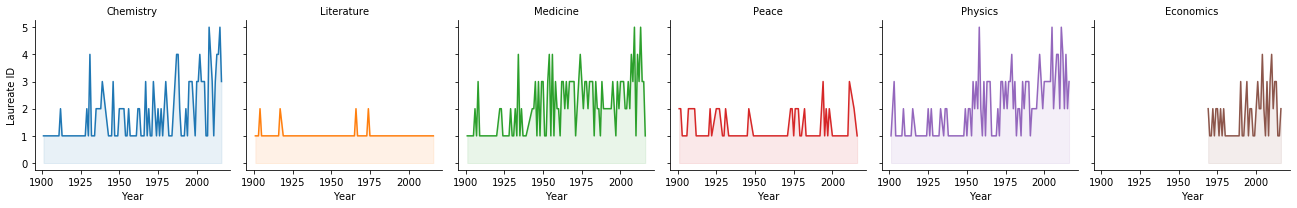

In [4]:
YearCategory=NobelData.groupby(['Year','Category'])['Laureate ID'].count().reset_index()
YearCategory
g = sns.FacetGrid(YearCategory, col='Category', hue='Category', col_wrap=8, )
g = g.map(plt.plot, 'Year', 'Laureate ID')
g = g.map(plt.fill_between, 'Year', 'Laureate ID', alpha=0.1).set_titles("{col_name} Category")
g = g.set_titles("{col_name}")
plt.show()

<h1>Number of Nobel Prizes in each category<h1>

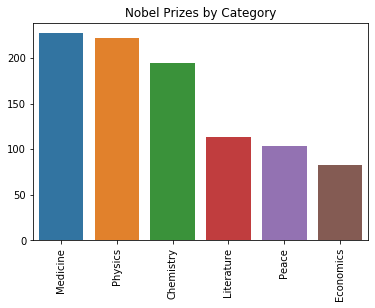

In [5]:

NobelCategory=NobelData['Category'].value_counts()
sns.barplot(x=NobelCategory.index,y=NobelCategory.values)
plt.xticks(rotation=90)
plt.title('Nobel Prizes by Category')
plt.show()

<h1>Visualization of number of prizes in each country in every category, USA dominance<h1>

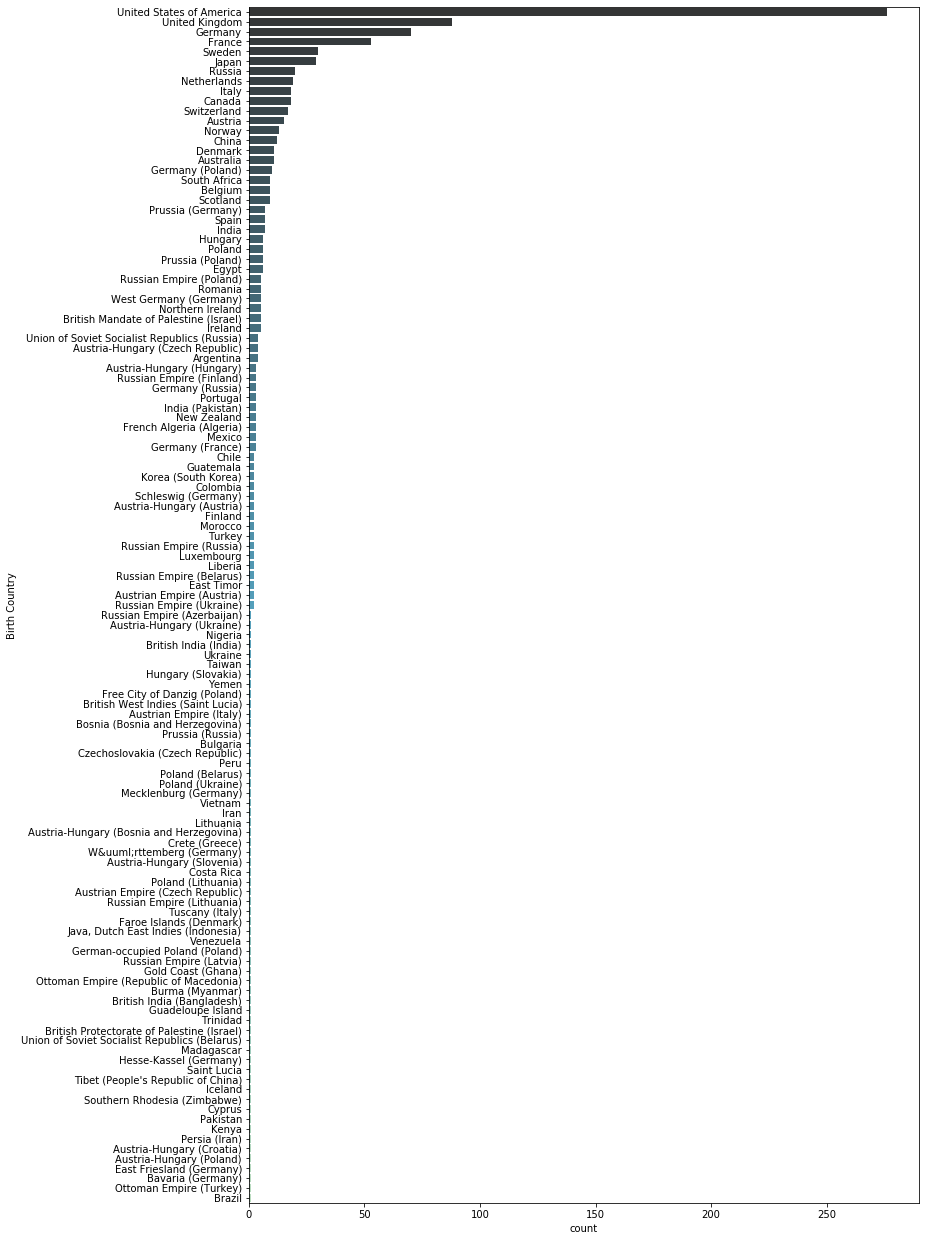

In [6]:

plt.figure(figsize=(12,22))
DataGraph = sns.countplot(y="Birth Country", data=NobelData,
              order=NobelData['Birth Country'].value_counts().index,
              palette='GnBu_d')
plt.show()

<h1>Visualization of number of prizes in each country in Chemistry category<h1>

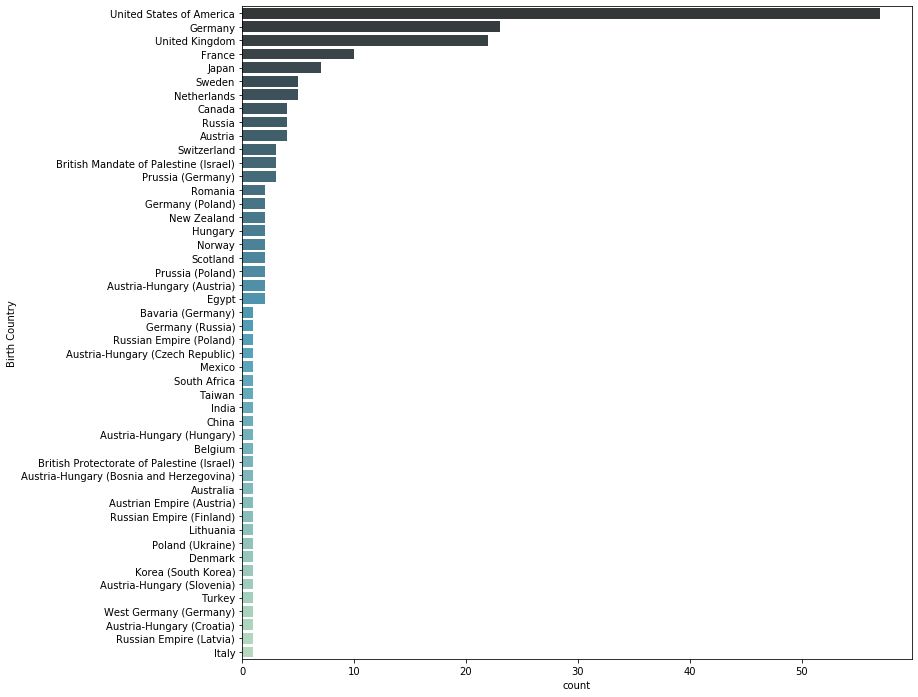

In [7]:
plt.figure(figsize=(12,12))
ChemestryGraph = sns.countplot(y="Birth Country", data=Chemistry,
              order=Chemistry['Birth Country'].value_counts().index,
              palette='GnBu_d')
plt.show()

<h1>Visualization of number of prizes in each country in Economics category<h1>

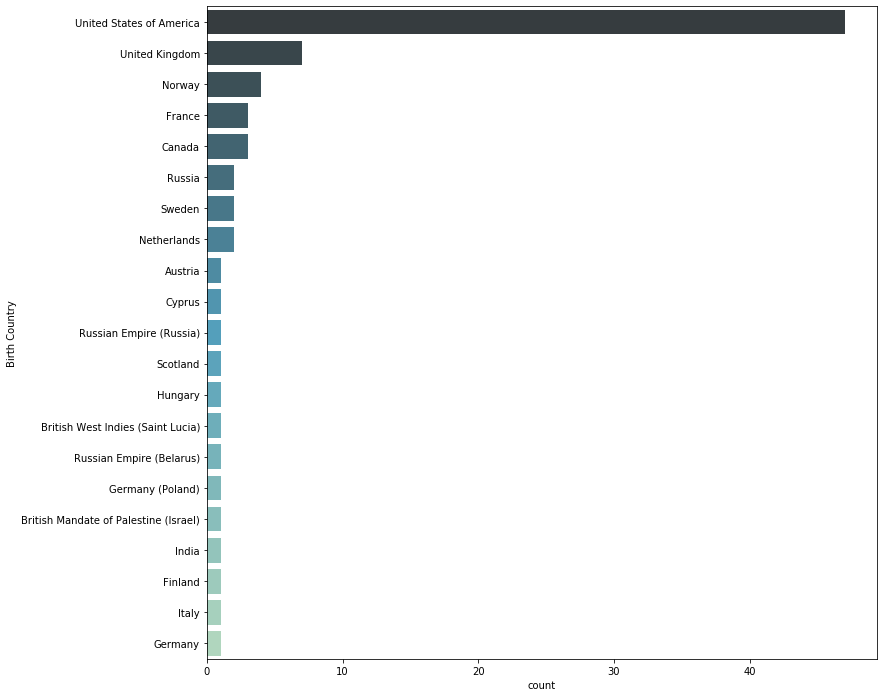

In [10]:
plt.figure(figsize=(12,12))
EconomicsGraph = sns.countplot(y="Birth Country", data=Economics,
              order=Economics['Birth Country'].value_counts().index,
              palette='GnBu_d')
plt.show()

<h1>Visualization of number of prizes in each country in Literature category<h1>

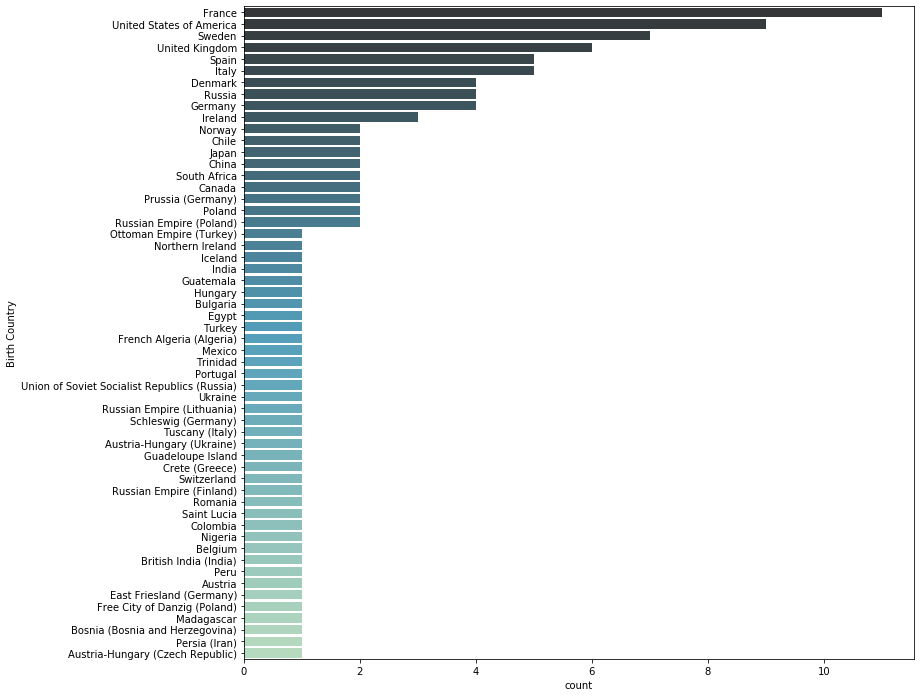

In [9]:
plt.figure(figsize=(12,12))
LiteratureGraph = sns.countplot(y="Birth Country", data=Literature,
              order=Literature['Birth Country'].value_counts().index,
              palette='GnBu_d')
plt.show()

<h1>Visualization of number of prizes in each country in Medicine category<h1>

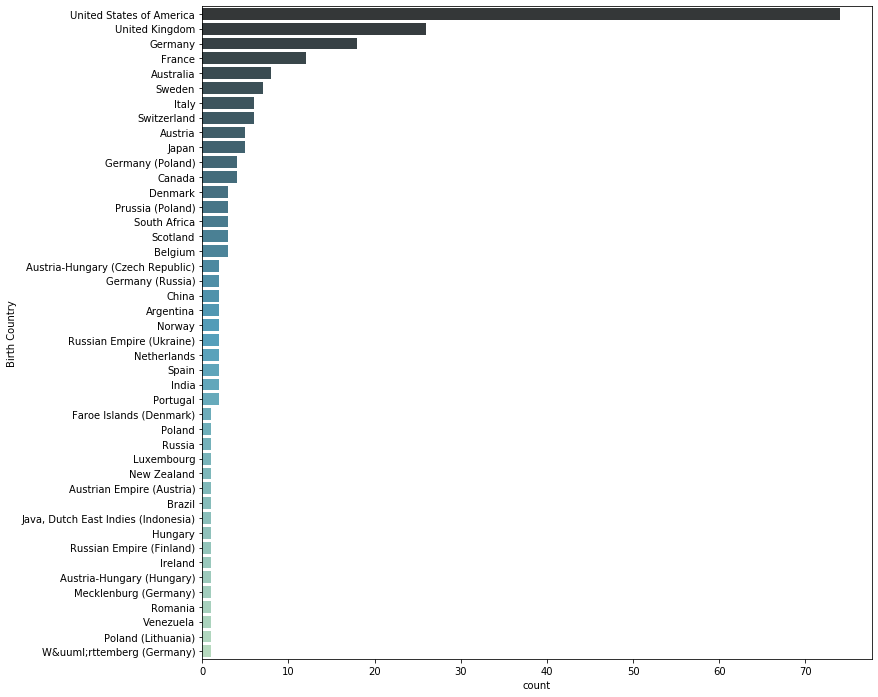

In [11]:
plt.figure(figsize=(12,12))
MedicineGraph = sns.countplot(y="Birth Country", data=Medicine,
              order=Medicine['Birth Country'].value_counts().index,
              palette='GnBu_d')
plt.show()

<h1>Visualization of number of prizes in each country in Peace category<h1>

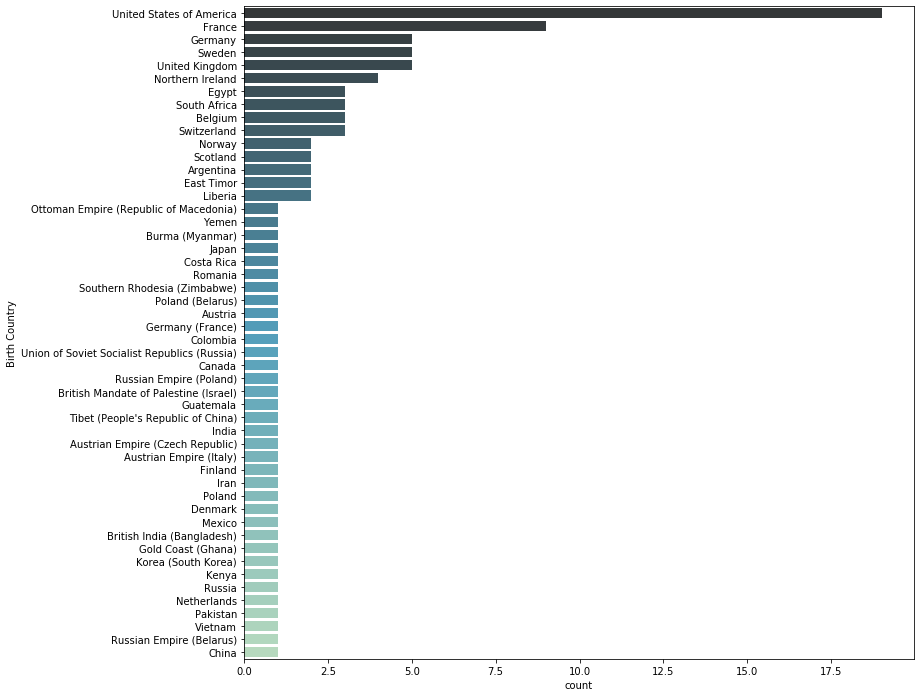

In [12]:
plt.figure(figsize=(12,12))
PeaceGraph = sns.countplot(y="Birth Country", data=Peace,
              order=Peace['Birth Country'].value_counts().index,
              palette='GnBu_d')
plt.show()

<h1>Visualization of number of prizes in each country in Physics category<h1>

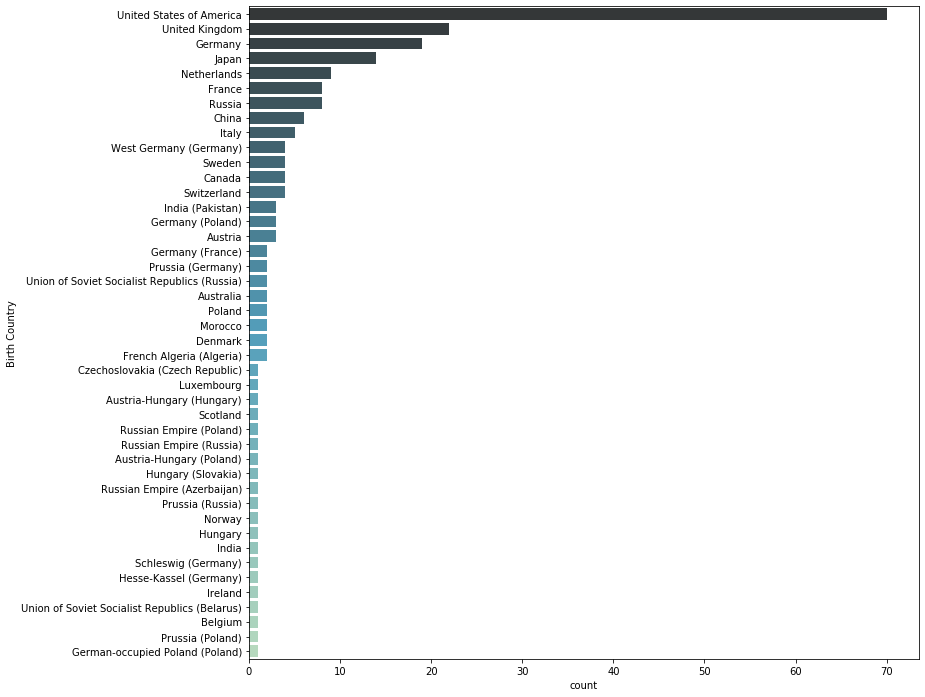

In [12]:
plt.figure(figsize=(12,12))
PhysicsGraph = sns.countplot(y="Birth Country", data=Physics,
              order=Physics['Birth Country'].value_counts().index,
              palette='GnBu_d')
plt.show()

<h1>Pie chart for the whole dataframe gender, which gender is most likely to win a nobel prize?<h1>

Male      893
Female     50
Name: Sex, dtype: int64


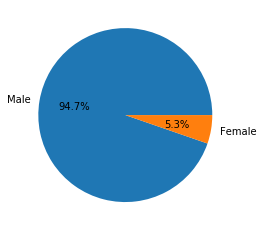

In [13]:
from matplotlib.pyplot import pie, axis, show

AllCategoryGender = NobelData['Sex'].value_counts()
print(AllCategoryGender)

pie(AllCategoryGender, labels=AllCategoryGender.index, autopct='%1.1f%%');
show()

<h1>Age differences between the whole nobel prize categories<h1>

In [14]:
import warnings
warnings.filterwarnings('ignore')
NobelData['Birth Date'] = NobelData['Birth Date'].str[0:4]
NobelData['Birth Date'] = NobelData['Birth Date'].replace(to_replace="nan", value=0)
NobelData['Birth Date'] = NobelData['Birth Date'].apply(pd.to_numeric)
NobelData["Age"] = NobelData["Year"] - NobelData["Birth Date"]

In [15]:
bins = [0, 19, 29, 39, 49, 59, 69, 79, 89, 100]
groupNames = ['Teens', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
NobelData['Age Categorical'] = pd.cut(NobelData['Age'], bins, labels=groupNames)

60s      270
50s      246
70s      163
40s      163
30s       51
80s       47
90s        1
20s        1
Teens      1
Name: Age Categorical, dtype: int64


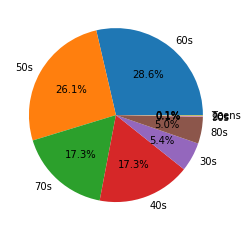

In [16]:
NobelAge = NobelData['Age Categorical'].value_counts()
print(NobelAge)

pie(NobelAge, labels=NobelAge.index, autopct='%1.1f%%');
show()

<h1>Age differences between the chemistry category<h1>

In [17]:
Chemistry['Birth Date'] = Chemistry['Birth Date'].str[0:4]
Chemistry['Birth Date'] = Chemistry['Birth Date'].replace(to_replace="nan", value=0)
Chemistry['Birth Date'] = Chemistry['Birth Date'].apply(pd.to_numeric)
Chemistry["Age"] = Chemistry["Year"] - Chemistry["Birth Date"]

In [18]:
bins = [0, 19, 29, 39, 49, 59, 69, 79, 89, 100]
groupNames = ['Teens', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
Chemistry['Age Categorical'] = pd.cut(Chemistry['Age'], bins, labels=groupNames)


50s      61
60s      52
40s      39
70s      24
80s       9
30s       9
90s       0
20s       0
Teens     0
Name: Age Categorical, dtype: int64


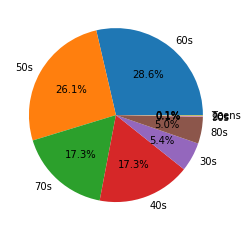

In [19]:
Chemistry = Chemistry['Age Categorical'].value_counts()
print(Chemistry)

pie(NobelAge, labels=NobelAge.index, autopct='%1.1f%%');
show()

<h1>Age differences between the Economics category<h1>

In [20]:
Economics['Birth Date'] = Economics['Birth Date'].str[0:4]
Economics['Birth Date'] = Economics['Birth Date'].replace(to_replace="nan", value=0)
Economics['Birth Date'] = Economics['Birth Date'].apply(pd.to_numeric)
Economics["Age"] = Economics["Year"] - Economics["Birth Date"]

In [21]:
bins = [0, 19, 29, 39, 49, 59, 69, 79, 89, 100]
groupNames = ['Teens', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
Economics['Age Categorical'] = pd.cut(Economics['Age'], bins, labels=groupNames)

60s      42
70s      24
50s      12
80s       4
90s       1
40s       0
30s       0
20s       0
Teens     0
Name: Age Categorical, dtype: int64


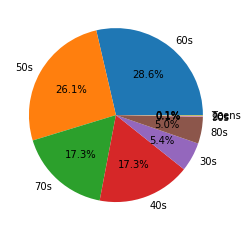

In [22]:
Economics = Economics['Age Categorical'].value_counts()
print(Economics)

pie(NobelAge, labels=NobelAge.index, autopct='%1.1f%%');
show()

<h1>Age differences between the Literature  category<h1>

In [23]:
Literature['Birth Date'] = Literature['Birth Date'].str[0:4]
Literature['Birth Date'] = Literature['Birth Date'].replace(to_replace="nan", value=0)
Literature['Birth Date'] = Literature['Birth Date'].apply(pd.to_numeric)
Literature["Age"] = Literature["Year"] - Literature["Birth Date"]

In [24]:
bins = [0, 19, 29, 39, 49, 59, 69, 79, 89, 100]
groupNames = ['Teens', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
Literature['Age Categorical'] = pd.cut(Literature['Age'], bins, labels=groupNames)

60s      37
70s      33
50s      28
40s       9
80s       6
90s       0
30s       0
20s       0
Teens     0
Name: Age Categorical, dtype: int64


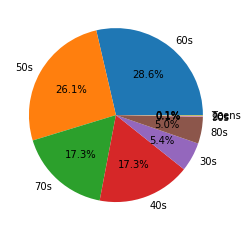

In [25]:
Literature = Literature['Age Categorical'].value_counts()
print(Literature)

pie(NobelAge, labels=NobelAge.index, autopct='%1.1f%%');
show()

<h1>Age differences between the Medicine category<h1>

In [26]:
Medicine['Birth Date'] = Medicine['Birth Date'].str[0:4]
Medicine['Birth Date'] = Medicine['Birth Date'].replace(to_replace="nan", value=0)
Medicine['Birth Date'] = Medicine['Birth Date'].apply(pd.to_numeric)
Medicine["Age"] = Medicine["Year"] - Medicine["Birth Date"]

In [27]:
bins = [0, 19, 29, 39, 49, 59, 69, 79, 89, 100]
groupNames = ['Teens', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
Medicine['Age Categorical'] = pd.cut(Medicine['Age'], bins, labels=groupNames)

50s      74
60s      56
40s      44
70s      31
30s      12
80s      10
90s       0
20s       0
Teens     0
Name: Age Categorical, dtype: int64


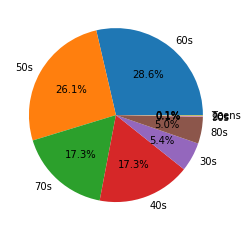

In [28]:
Medicine = Medicine['Age Categorical'].value_counts()
print(Medicine)

pie(NobelAge, labels=NobelAge.index, autopct='%1.1f%%');
show()

<h1>Age differences between the Peace category<h1>

In [29]:
Peace['Birth Date'] = Peace['Birth Date'].str[0:4]
Peace['Birth Date'] = Peace['Birth Date'].replace(to_replace="nan", value=0)
Peace['Birth Date'] = Peace['Birth Date'].apply(pd.to_numeric)
Peace["Age"] = Peace["Year"] - Peace["Birth Date"]

In [30]:
bins = [0, 19, 29, 39, 49, 59, 69, 79, 89, 100]
groupNames = ['Teens', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
Peace['Age Categorical'] = pd.cut(Peace['Age'], bins, labels=groupNames)

60s      32
70s      26
50s      19
40s      14
80s       6
30s       6
Teens     1
90s       0
20s       0
Name: Age Categorical, dtype: int64


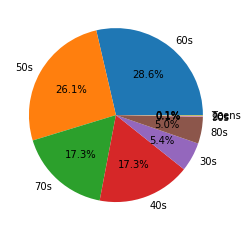

In [31]:
Peace = Peace['Age Categorical'].value_counts()
print(Peace)

pie(NobelAge, labels=NobelAge.index, autopct='%1.1f%%');
show()

<h1>Age differences between the Physics category<h1>

In [32]:
Physics['Birth Date'] = Physics['Birth Date'].str[0:4]
Physics['Birth Date'] = Physics['Birth Date'].replace(to_replace="nan", value=0)
Physics['Birth Date'] = Physics['Birth Date'].apply(pd.to_numeric)
Physics["Age"] = Physics["Year"] - Physics["Birth Date"]

In [33]:
bins = [0, 19, 29, 39, 49, 59, 69, 79, 89, 100]
groupNames = ['Teens', '20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
Physics['Age Categorical'] = pd.cut(Physics['Age'], bins, labels=groupNames)

40s      57
50s      52
60s      51
70s      25
30s      24
80s      12
20s       1
90s       0
Teens     0
Name: Age Categorical, dtype: int64


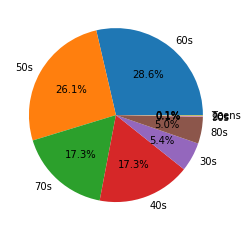

In [34]:
Physics = Physics['Age Categorical'].value_counts()
print(Physics)

pie(NobelAge, labels=NobelAge.index, autopct='%1.1f%%');
show()

<h1>Distribution of Age of Winners in each Category using boxplot<h1>

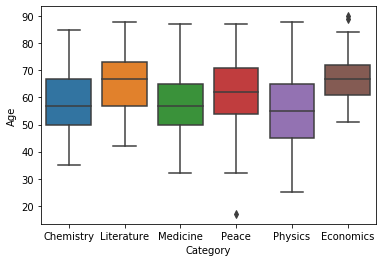

In [35]:
sns.boxplot(data=NobelData,
         x='Category',
         y='Age')

plt.show()

<h1>Organizations with the largest number of nobel prizes<h1>

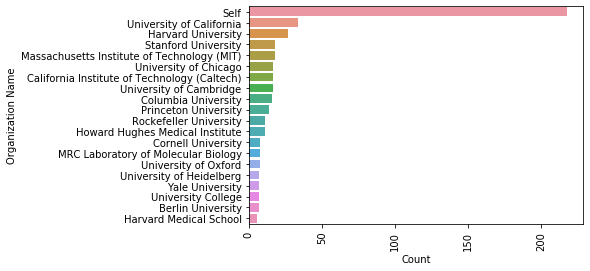

In [21]:
org = NobelData['Organization Name'].value_counts().reset_index().head(20)

sns.barplot(x='Organization Name',y='index',data=org)
plt.xticks(rotation=90)
plt.ylabel('Organization Name')
plt.xlabel('Count')
plt.show()

<h1>Oldest nobel prize winners<h1>

In [23]:
OldestWinners=NobelData.nlargest(5,'Age')
display(OldestWinners[['Category','Full Name','Birth Country','Sex','Age']])

,Category,Full Name,Birth Country,Sex,Age
803,Economics,Leonid Hurwicz,Russia,Male,90
881,Economics,Lloyd S. Shapley,United States of America,Male,89
750,Physics,Raymond Davis Jr.,United States of America,Male,88
806,Literature,Doris Lessing,Persia (Iran),Female,88
379,Medicine,Peyton Rous,United States of America,Male,87


<h1>Youngest nobel prize winners<h1>

In [24]:
YoungestWinner=NobelData.nsmallest(5,'Age')
display(YoungestWinner[['Category','Full Name','Birth Country','Sex','Age']])

,Category,Full Name,Birth Country,Sex,Age
915,Peace,Malala Yousafzai,Pakistan,Female,17
84,Physics,William Lawrence Bragg,Australia,Male,25
166,Physics,Werner Karl Heisenberg,Germany,Male,31
171,Physics,Paul Adrien Maurice Dirac,United Kingdom,Male,31
191,Physics,Carl David Anderson,United States of America,Male,31


<h1>First woman to win the nobel prize<h1>

In [25]:
female=NobelData[NobelData['Sex']=="Female"].nsmallest(1,'Year')
female[['Year','Category','Full Name','Prize']]

,Year,Category,Full Name,Prize
19,1903,Physics,"Marie Curie, née Sklodowska",The Nobel Prize in Physics 1903


<h1>Repeat laureates<h1>

In [38]:
repeat=NobelData.groupby(['Category','Full Name']).filter(lambda group : len(group)>=2)
repeat

,Unnamed: 0,Year,Category,Prize,Prize Share,Laureate ID,Laureate Type,Full Name,Birth Date,Birth City,Birth Country,Sex,Organization Name,Organization City,Organization Country,Age,Age Categorical
45,46,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,1/2,302,Individual,Paul Ehrlich,1854,Strehlen (Strzelin),Prussia (Poland),Male,Goettingen University,Göttingen,Germany,54,50s
46,47,1908,Medicine,The Nobel Prize in Physiology or Medicine 1908,1/2,302,Individual,Paul Ehrlich,1854,Strehlen (Strzelin),Prussia (Poland),Male,Königliches Institut für experimentelle Therap...,Frankfurt-on-the-Main,Germany,54,50s
154,157,1931,Chemistry,The Nobel Prize in Chemistry 1931,1/2,189,Individual,Carl Bosch,1874,Cologne,Germany,Male,University of Heidelberg,Heidelberg,Germany,57,50s
155,158,1931,Chemistry,The Nobel Prize in Chemistry 1931,1/2,189,Individual,Carl Bosch,1874,Cologne,Germany,Male,I.G. Farbenindustrie A.G.,Heidelberg,Germany,57,50s
156,159,1931,Chemistry,The Nobel Prize in Chemistry 1931,1/2,190,Individual,Friedrich Bergius,1884,"Goldschmieden, near Breslau",Germany (Poland),Male,University of Heidelberg,Heidelberg,Germany,47,40s
157,160,1931,Chemistry,The Nobel Prize in Chemistry 1931,1/2,190,Individual,Friedrich Bergius,1884,"Goldschmieden, near Breslau",Germany (Poland),Male,I.G. Farbenindustrie A.G.,Mannheim-Rheinau,Germany,47,40s
176,179,1934,Medicine,The Nobel Prize in Physiology or Medicine 1934,1/3,328,Individual,William Parry Murphy,1892,"Stoughton, WI",United States of America,Male,Harvard University,"Cambridge, MA",United States of America,42,40s
177,180,1934,Medicine,The Nobel Prize in Physiology or Medicine 1934,1/3,328,Individual,William Parry Murphy,1892,"Stoughton, WI",United States of America,Male,Peter Brent Brigham Hospital,"Boston, MA",United States of America,42,40s
184,187,1936,Chemistry,The Nobel Prize in Chemistry 1936,1/1,195,Individual,Petrus (Peter) Josephus Wilhelmus Debye,1884,Maastricht,Netherlands,Male,Berlin University,Berlin,Germany,52,50s
185,188,1936,Chemistry,The Nobel Prize in Chemistry 1936,1/1,195,Individual,Petrus (Peter) Josephus Wilhelmus Debye,1884,Maastricht,Netherlands,Male,Kaiser-Wilhelm-Institut (now Max-Planck-Instit...,Berlin,Germany,52,50s


<h1>EXTRA: age distribution of nobel prize winners among the years using scatterplot<h1>

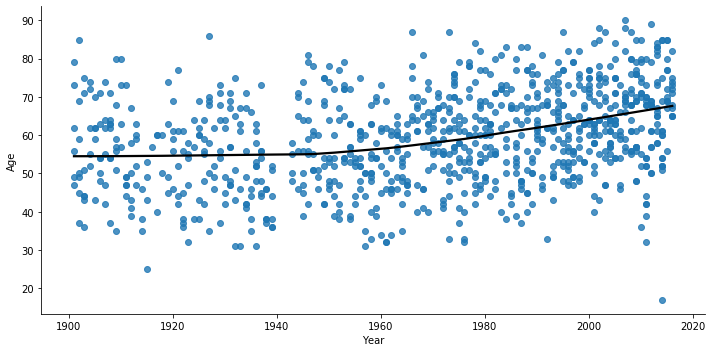

In [39]:
sns.lmplot('Year','Age',data=NobelData,lowess=True, aspect=2,  line_kws={'color' : 'black'})
plt.show()